# Student Performance Indicator

#### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Model Selection

### 1) Problem Statement

- This project attempts to understand how student's performance (exam scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

### 2) Data Collection

- Dataset Source - 
- The data consists of 8 columns and 1000 rows

#### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV File as Pandas DataFrame

In [3]:
df = pd.read_csv("data\StudentsPerformance.csv")


#### Show top 5 records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- parental level of education -> parent's education level -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: lunch type before test -> (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set.

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

### 3.3 Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- Means of the 3 categories are all very close together - between 66 and 69.2
- All standard deviations are also close - between 14.6 and 15.19
- A student got a score of 0 for math but for reading and writing, the minimum was much higher -> (17 and 10 respectively)

### 3.7 Exploring Data

In [14]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" " )
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [15]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [21]:
reading_full = df[df['reading score'] <= 20]['average'].count()
writing_full = df[df['writing score'] <= 20]['average'].count()
math_full = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 in Math: {math_full}')
print(f'Number of students with less than 20 in Writing: {writing_full}')
print(f'Number of students with less than 20 in Reading: {reading_full}')

Number of students with less than 20 in Math: 4
Number of students with less than 20 in Writing: 3
Number of students with less than 20 in Reading: 1


#### Insights
- From our analysis above, we can see that students have performed the worst in Math
- Best performance is in the reading section

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

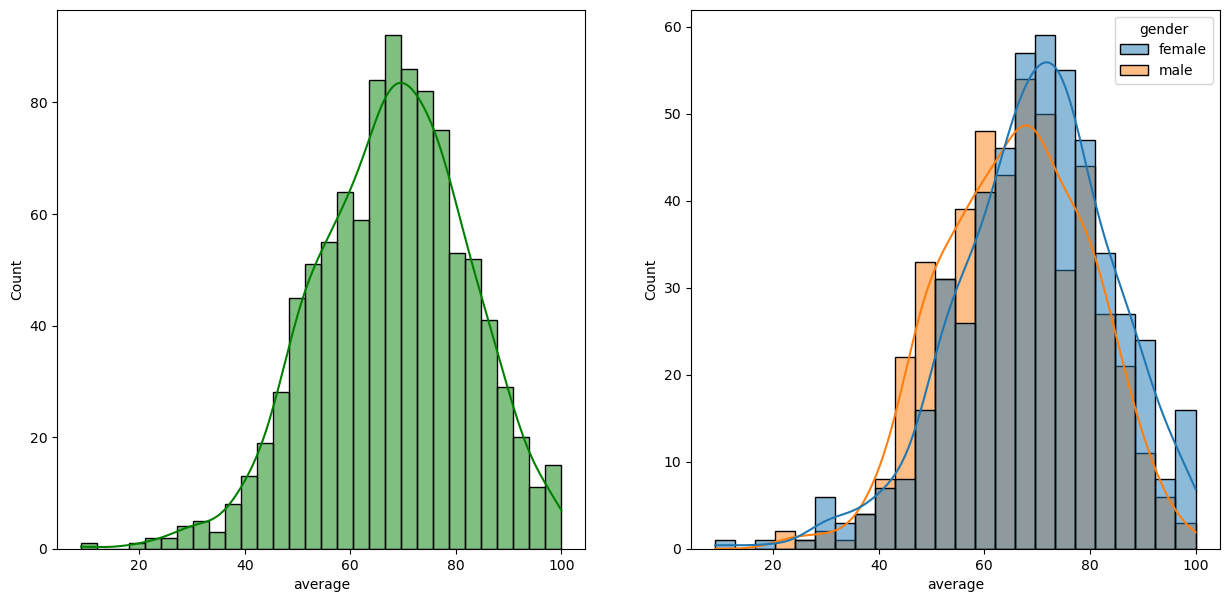

In [24]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='average',bins=30,kde=True,color='g', ax=axs[0])
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
plt.show()

#### Insights
- Females perform better than males on average

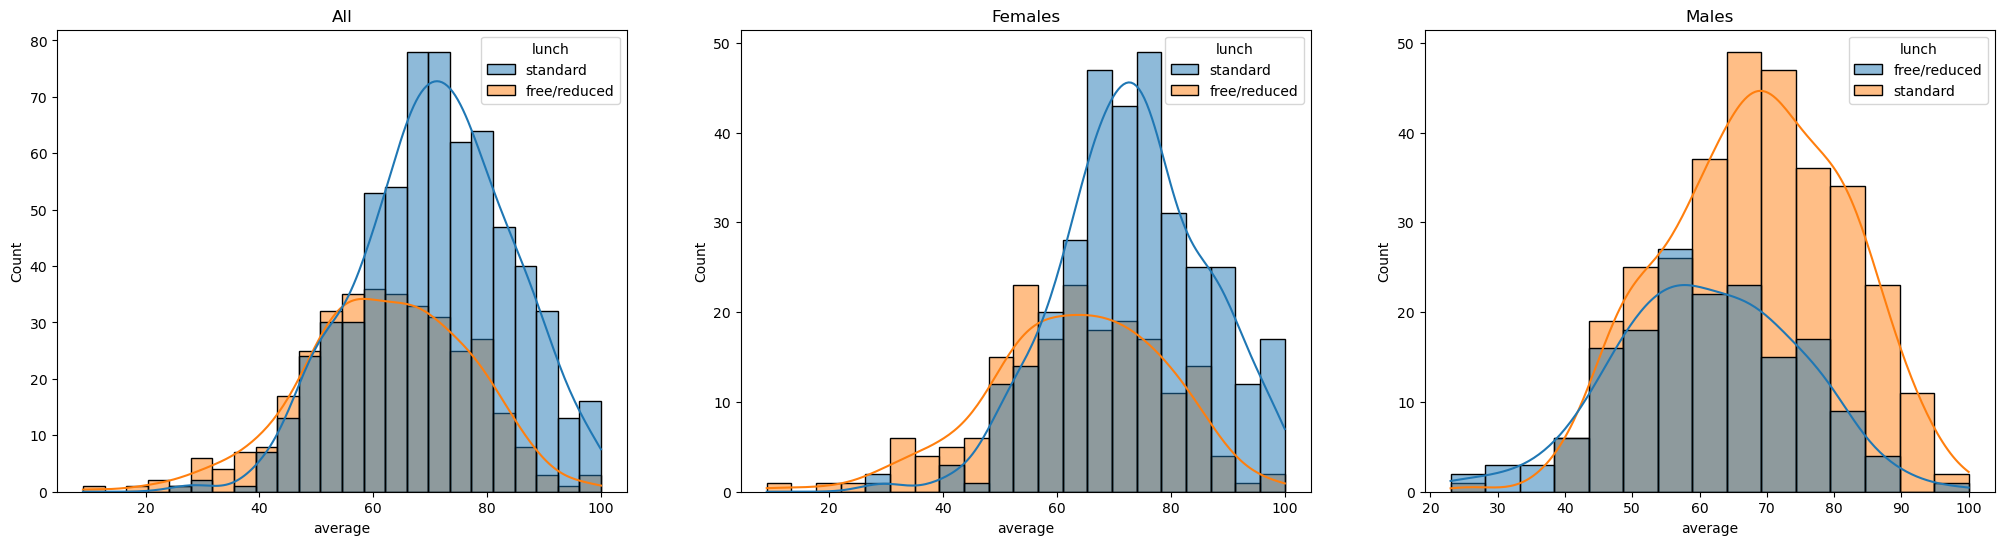

In [28]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='lunch',ax=axs[0]).set_title("All")
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch',ax=axs[1]).set_title("Females")
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch',ax=axs[2]).set_title("Males")
plt.show()

### Insights
